In [1]:
import seaborn as sns
import random
from tabulate import tabulate
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def violinplot_delice(df,x_group,y_variable,violin_width=0.85,y_label=None,palette="PuRd",violin_edge_color="black",point_size=10,jitter=0.05,title=None,title_loc="left",title_size=10):
    if y_label == None:
        ylabel = y_variable

    color_map = sns.color_palette(palette, n_colors=len(np.unique(df[x_group])))
    color_dic = {cond: color for cond, color in zip(np.unique(df[x_group]), color_map)}

    labels = [i for i in color_dic]

    # plot settings
    fig, axs = plt.subplots()
    colors = [i for i in color_dic.values()]

    # Test every combination
    # Check from the outside pairs of boxes inwards
    ls = list(range(1, len(labels) + 1))
    combinations = [(ls[x], ls[x + y]) for y in reversed(ls) for x in range((len(ls) - y))]
    significant_combinations = []
    for combination in combinations:
        data1 = df[y_variable][df[x_group] == labels[combination[0] - 1]]
        data2 = df[y_variable][df[x_group] == labels[combination[1] - 1]]
        # Significance
        U, p = stats.ttest_ind(data1, data2, alternative='two-sided')
        
        # bonferroni correction
        
        p_adj = p * len(combinations)
        print("{} x {:<30}   padj: {:<2}  p-val: {:<10}".format(
        labels[combination[0] - 1],
        labels[combination[1] - 1],
        p_adj,
        p
    ))

        if p < 0.05:
            significant_combinations.append([combination, p_adj])
        else:
            significant_combinations.append([combination, p_adj])
        #print(f"{list(groups.keys())[combination[0]-1]} - {list(groups.keys())[combination[1]-1]} | {p}")

    # individual points
    for i,cond in enumerate(color_dic):

        # workaround the truncation
        data_to_plot = df[y_variable][df[x_group]==cond]
        data_min = data_to_plot.min()
        data_max = data_to_plot.max()
        data_to_plot_adj =  pd.concat([pd.Series([data_min,data_max]),data_to_plot], ignore_index=True)


        x_values = [i + 1] * len(data_to_plot)
        x_jittered = [val + (jitter * (2 * (random.random() - 0.5))) for val in x_values]

        parts = plt.violinplot(data_to_plot_adj,[i+1],showmedians=False,
            showextrema=False, widths=violin_width)
        for pc in parts['bodies']:
            pc.set_facecolor('white')
            pc.set_edgecolor(violin_edge_color)
            pc.set_linewidths(2)
            pc.set_alpha(1)
            
        # mean
        plt.hlines(np.mean(df[y_variable][df[x_group]==cond]), i + 0.8, i + 1.2, color='red', linewidth=2, alpha=1, )
        print("{:>10} mean: {:>45}".format(cond,np.mean(df[y_variable][df[x_group]==cond])))
        # points
        plt.scatter(x_jittered, df[y_variable][df[x_group]==cond], color = colors[i], alpha=1, s=point_size, edgecolors='black',zorder=3)
        
        

    # add signif bars
    plt.xticks(range(1, len(labels) + 1), labels)
    # Add Significance bars
    # Get the y-axis limits
    bottom, top = plt.ylim()
    y_range = top - bottom
    for i, significant_combination in enumerate(significant_combinations):
        # Columns corresponding to the datasets of interest
        x1 = significant_combination[0][0]
        x2 = significant_combination[0][1]
        # What level is this bar among the bars above the plot?
        level = len(significant_combinations) - i
        # Plot the bar
        bar_height = (y_range * 0.07 * level) + top + 0.4
        bar_tips = bar_height - (y_range * 0.02)
        plt.plot(
            [x1, x1, x2, x2],
            [bar_tips, bar_height, bar_height, bar_tips], lw=1, c='k'
        )
        # Significance level
        p = significant_combination[1]
        if p < 0.001:
            sig_symbol = '***'
        elif p < 0.01:
            sig_symbol = '**'
        elif p < 0.05:
            sig_symbol = '*'
        else:
            sig_symbol = "ns"
        text_height = bar_height + (y_range * 0.01)
        plt.text((x1 + x2) * 0.5, text_height, sig_symbol, ha='center', va='bottom', c='k', weight='bold')

    # custom 
    axs.spines[['right', 'top']].set_visible(False)
    # Change the x-axis line weight
    axs.spines['bottom'].set_linewidth(2)  

    # Change the y-axis line weight
    axs.spines['left'].set_linewidth(2) 
    # Set labels and legend
    plt.xticks(range(1, len(color_dic) + 1), weight='bold')
    #plt.xlabel('treatment')
    plt.ylabel(y_label, weight='bold')
    plt.title(title, loc=title_loc, fontsize=title_size)
    plt.show()
    
    return fig,axs

In [2]:
def barplot_delice(df, x_group, y_variable, y_label=None,x_label=None, palette="PuRd",bar_width=0.5, bar_edge_color="black", point_size=10, jitter=0.05, title=None, title_loc="left", title_size=10,label_rotation=45, bar_edge_width=3,errorbar_width=2):
    if y_label is None:
        y_label = y_variable
    if x_label is None:
        x_label = x_group

    color_map = sns.color_palette(palette, n_colors=len(np.unique(df[x_group])))
    color_dic = {cond: color for cond, color in zip(np.unique(df[x_group]), color_map)}

    labels = [i for i in color_dic]

    # Plot settings
    fig, axs = plt.subplots()
    colors = [i for i in color_dic.values()]

    # Test every combination
    # Check from the outside pairs of boxes inwards
    ls = list(range(1, len(labels) + 1))
    combinations = [(ls[x], ls[x + y]) for y in reversed(ls) for x in range((len(ls) - y))]
    significant_combinations = []
    for combination in combinations:
        data1 = df[y_variable][df[x_group] == labels[combination[0] - 1]]
        data2 = df[y_variable][df[x_group] == labels[combination[1] - 1]]
        # Significance
        U, p = stats.ttest_ind(data1, data2, alternative='two-sided')
        
        # Bonferroni correction
        p_adj = p * len(combinations)
        print("{} x {:<30}   padj: {:<2}  p-val: {:<10}".format(
            labels[combination[0] - 1],
            labels[combination[1] - 1],
            p_adj,
            p
        ))

        if p_adj < 0.05:
            significant_combinations.append([combination, p_adj])
        else:
            # significant_combinations.append([combination, p_adj])
            continue

    # Individual bar plots
    for i, cond in enumerate(color_dic):
        data_to_plot = df[y_variable][df[x_group] == cond]
        mean = np.mean(data_to_plot)
        std = np.std(data_to_plot)

        # Plot bar with thicker edges
        bar = axs.bar(i + 1, mean, color=colors[i],width=bar_width, edgecolor=bar_edge_color,linewidth=bar_edge_width)
        
        # Plot error bars with thicker edges
        plt.errorbar(i + 1, mean, yerr=std, fmt='none', ecolor=bar_edge_color, elinewidth=errorbar_width, capsize=5, capthick=errorbar_width)

        # Mean
        #plt.scatter([i + 1], [mean], color='red', zorder=3)
        print("{:>10} mean: {:>45}".format(cond, mean))

        # Individual points with jitter
        # x_jittered = [i + 1 + (jitter * (2 * (random.random() - 0.5))) for _ in data_to_plot]
        # plt.scatter(x_jittered, data_to_plot, color=colors[i], alpha=1, s=point_size, edgecolors='black', zorder=3)

    # Adjust x-ticks
    axs.set_xticks(range(1, len(labels) + 1))
    axs.set_xticklabels(labels, rotation=label_rotation, ha='center')

    # Add signif bars
    bottom, top = plt.ylim()
    y_range = top - bottom
    for i, significant_combination in enumerate(significant_combinations):
        x1 = significant_combination[0][0]
        x2 = significant_combination[0][1]
        level = len(significant_combinations) - i
        bar_height = (y_range * 0.07 * level) + top + 0.4
        bar_tips = bar_height - (y_range * 0.02)
        plt.plot(
            [x1, x1, x2, x2],
            [bar_tips, bar_height, bar_height, bar_tips], lw=bar_edge_width, c='k'
        )
        p = significant_combination[1]
        if p < 0.001:
            sig_symbol = '***'
        elif p < 0.01:
            sig_symbol = '**'
        elif p < 0.05:
            sig_symbol = '*'
        else:
            # sig_symbol = "ns"
            continue
        text_height = bar_height + (y_range * 0.01)
        plt.text((x1 + x2) * 0.5, text_height, sig_symbol, ha='center', va='bottom', c='k', weight='bold', size=bar_edge_width*7)

    # Customization
    axs.spines[['right', 'top']].set_visible(False)
    axs.spines['bottom'].set_linewidth(2)  
    axs.spines['left'].set_linewidth(2) 
    plt.xlabel(x_label, weight='bold')
    plt.ylabel(y_label, weight='bold')
    plt.title(title, loc=title_loc, fontsize=title_size)
    plt.show()

    return fig, axs


In [3]:
path = "/Volumes/G_MLS_RB_UHOME$/qfavey/01_Experiments/F_Spinal Muscle Staining/F01-005/2024-05-16/output-scale-UV-2.csv"
df = pd.read_csv(path)


In [4]:

conds = ["Inpp5e",'WT','Cc2d2a']
genotypes = []
for name in df['Name']:
    for cond in conds:
        if cond in name:
            genotypes.append(cond)
        
df['genotype'] = genotypes


Cc2d2a x WT                               padj: 0.3170202373627855  p-val: 0.10567341245426183
Cc2d2a x Inpp5e                           padj: 0.010020151178043005  p-val: 0.0033400503926810017
Inpp5e x WT                               padj: 0.0015138120354050927  p-val: 0.0005046040118016976
    Cc2d2a mean:                            0.9369576539101186
    Inpp5e mean:                            0.7467385296999952
        WT mean:                            0.8918891043260757


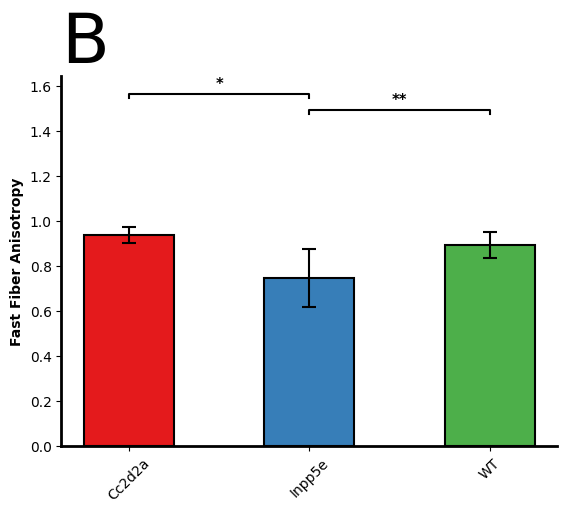

In [5]:
violin,axs = barplot_delice(df,'genotype','Fa',point_size=40,bar_width=0.50,jitter=0.06,title="B",title_size = 50,x_label=" ",y_label=r"Fast Fiber Anisotropy",palette='Set1',bar_edge_color='black', bar_edge_width=1.5, errorbar_width=1.5)
#violin.savefig("F01-004-MPS-per-Somite.pdf", bbox_inches='tight')

In [6]:
def strarray_to_array(array_str):
    
    # Convert string to array
    array = np.fromstring(array_str[1:-1], sep=' ')

    return array

In [7]:
def strarray_to_array(array_str):
    # Convert string to array
    array = np.fromstring(array_str[1:-1], sep=' ')
    return array

# convert the str_arrays to arrays
df['angles'] = df['angles'].apply(strarray_to_array)




In [8]:
mean_angles = {}
sd_angles = {}
for cond in conds:
    mean_angles[cond] = np.mean(df['angles'][df['genotype'] == cond])
    sd_angles[cond] = np.std([df['angles'][df['genotype'] == cond]])
print(sd_angles)


{'Inpp5e': array([0.01132744, 0.01180249, 0.01164256, 0.01326441, 0.01512439,
       0.01911277, 0.02503125, 0.03452943, 0.04584107, 0.06047602,
       0.07218007, 0.08440201, 0.09761824, 0.10596915, 0.11605702,
       0.1178057 , 0.11740874, 0.12294519, 0.12382183, 0.13078608,
       0.13565591, 0.13316399, 0.12565728, 0.11612874, 0.10435864,
       0.09779618, 0.10450058, 0.1168301 , 0.13021126, 0.13745945,
       0.13474817, 0.13126466, 0.12600188, 0.11655191, 0.10227685,
       0.08959346, 0.0805521 , 0.06930983, 0.0594714 , 0.0511623 ,
       0.04407588, 0.03778355, 0.03225804, 0.02722657, 0.02449932,
       0.02109394, 0.01819426, 0.01544762, 0.01483929, 0.01399027,
       0.01134836, 0.01178539, 0.01145729, 0.0118818 , 0.01402164,
       0.01601286, 0.02018345, 0.02543723, 0.03296752, 0.04156962,
       0.05147199, 0.07121924, 0.08614494, 0.10254057, 0.1140759 ,
       0.12380056, 0.12641352, 0.12738531, 0.12927877, 0.13302222,
       0.13915203, 0.14322309, 0.14439642, 0.136284

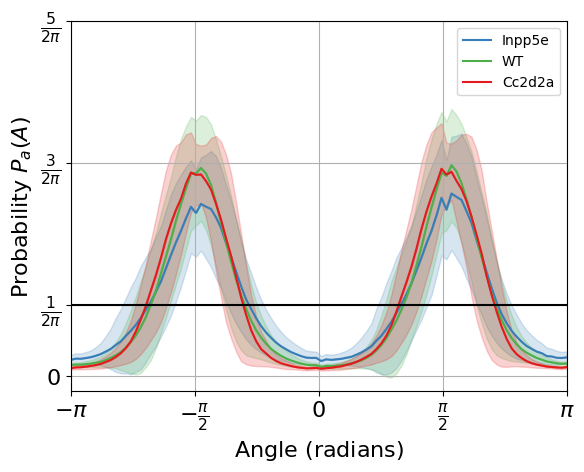

In [9]:
# Plot the PDF as a line plot
plt.figure()
color_map = sns.color_palette("Set1", n_colors=len(conds))
color_dic = {cond: color for cond, color in zip(np.sort(conds), color_map)}
for cond in conds:
    x=np.linspace(-np.pi,np.pi,len(mean_angles[cond]))
    plt.plot(x, mean_angles[cond], linestyle='-', marker='',label=cond,color=color_dic[cond])
    plt.fill_between(x,mean_angles[cond],mean_angles[cond]+sd_angles[cond],color=color_dic[cond],alpha=0.2)
    plt.fill_between(x,mean_angles[cond],mean_angles[cond]-sd_angles[cond],color=color_dic[cond],alpha=0.2)

# Set x-axis limits to -π to π
plt.xlim(-np.pi, np.pi)

# add 1/(2pi) vlin
plt.hlines(1/np.pi/2,-np.pi,np.pi,color = 'black')

# Set x-axis ticks to π values with bigger font size
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
        [r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'], fontsize=16)

# Set y-axis ticks to π values with bigger font size
plt.yticks([ 0, 1/np.pi/2, 3/2/np.pi,5/2/np.pi], 
        [ r'$0$', r'$\frac{1 }{2\pi}$', r'$\frac{3}{2\pi}$',r'$\frac{5}{2\pi}$'], fontsize=16)

# Set title with bigger font size
# plt.title(f'Probability Density Function of WTMM Angles \n', fontsize=18, loc="center" )
#plt.text(0.1,0.71,f'Scale $a={5}px$')
plt.xlabel(r'$\text{Angle (radians)}$', fontsize=16)
plt.ylabel(r'Probability $P_{a}(A)$', fontsize=16)
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

Cc2d2a x WT                               padj: 0.3170202373627855  p-val: 0.10567341245426183
Cc2d2a x Inpp5e                           padj: 0.010020151178043005  p-val: 0.0033400503926810017
Inpp5e x WT                               padj: 0.0015138120354050927  p-val: 0.0005046040118016976
    Cc2d2a mean:                            0.9369576539101186
    Inpp5e mean:                            0.7467385296999952
        WT mean:                            0.8918891043260757


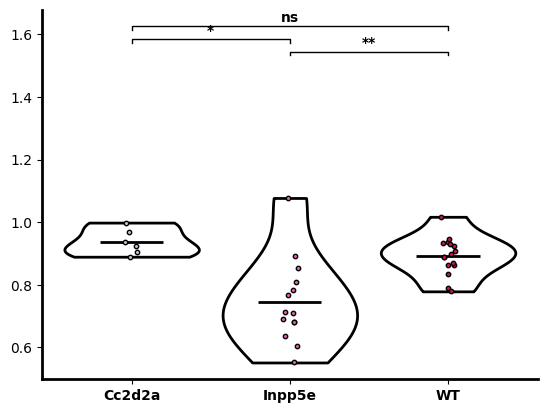

(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [10]:
import utils.WTMM as WTMM
WTMM.violinplot_delice(df,'genotype','Fa')